In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/EV/Electric_Vehicle_Population_Data.csv')

In [ ]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


VIN (1-10): Partial Vehicle Identification Number.

County: The county in which the vehicle is registered.

City: The city in which the vehicle is registered.

State: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.

Postal Code: The postal code where the vehicle is registered.

Model Year: The year of the vehicle model.

Make: The manufacturer of the vehicle.

Model: The model of the vehicle.

Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).

Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.

Electric Range: The maximum range of the vehicle on a single charge (in miles).
Base MSRP: The Manufacturer’s Suggested Retail Price.

Legislative District: The legislative district where the vehicle is registered.
DOL Vehicle ID: Department of Licensing Vehicle Identification.

Vehicle Location: Geographic coordinates of the vehicle location.
Electric Utility: The electric utility service provider for the vehicle’s location.

2020 Census Tract: The census tract for the vehicle’s location.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


The five number summary suggests that most of the values in Electric range and base MSRP are zeros.

Lets remove some of the columns that does not add much value

In [ ]:
data = data[['County', 'City', 'State', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Range', 'Base MSRP']]

In [ ]:
data.isnull().sum()

County                   5
City                     5
State                    0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
Electric Range           0
Base MSRP                0
dtype: int64

In [ ]:
data.dropna(inplace=True)

Number of cars made in each year

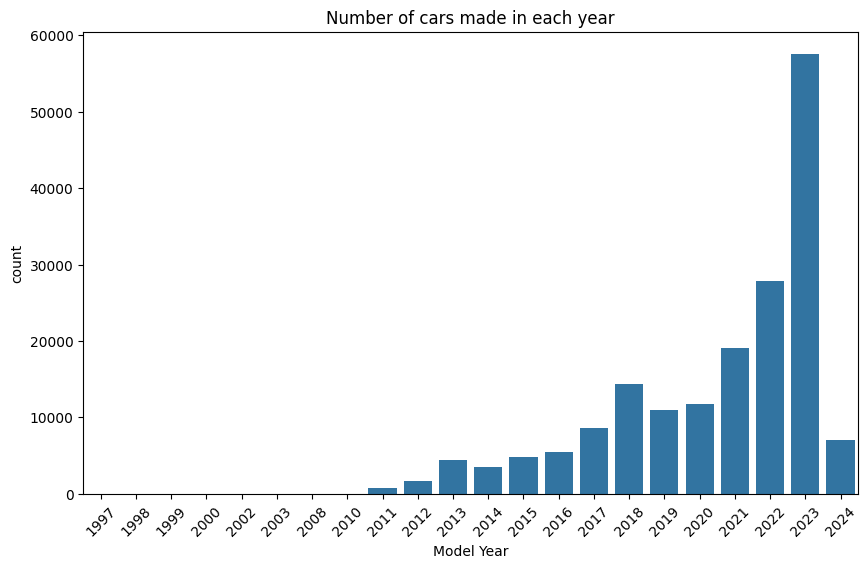

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.countplot(x='Model Year', data=data)
plt.title('Number of cars made in each year')
plt.xticks(rotation=45)
plt.show()

In [ ]:
lst = []
for i in data['Model Year']:
  if i in range(1997, 2011):
    lst.append(2011)
  else:
    lst.append(i)

data['Model Year'] = lst

In [ ]:
year = pd.DataFrame(data['Model Year'].value_counts()).sort_index().reset_index()
year

,Model Year,count
0,2011,834
1,2012,1618
2,2013,4408
3,2014,3509
4,2015,4844
5,2016,5483
6,2017,8561
7,2018,14322
8,2019,10939
9,2020,11768


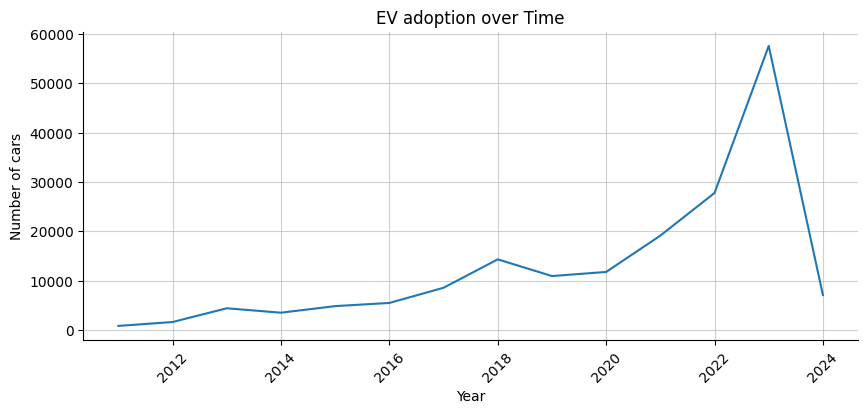

In [ ]:
fig = plt.figure(figsize=(10,4))
plt.plot(year['Model Year'], year['count'])
plt.title('EV adoption over Time')
plt.xlabel('Year')
plt.ylabel('Number of cars')
plt.xticks(rotation=45)
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(True, alpha=0.6)
plt.show()

Since no of ev cars made till 2011 is very low, We merged the data till 2011.

The overall upward trend shows that EV adaption growing at staggering rate, especially after the 2020 pandemic.

The less number of cars in 2024 is because, partial data is available.

In [ ]:
## lets see the top 5 EV Manufacturers.
top_five_manufacturers = pd.DataFrame(data['Make'].value_counts().head(5)).reset_index()
top_five_manufacturers


,Make,count
0,TESLA,79655
1,NISSAN,13997
2,CHEVROLET,13678
3,FORD,9199
4,BMW,7570


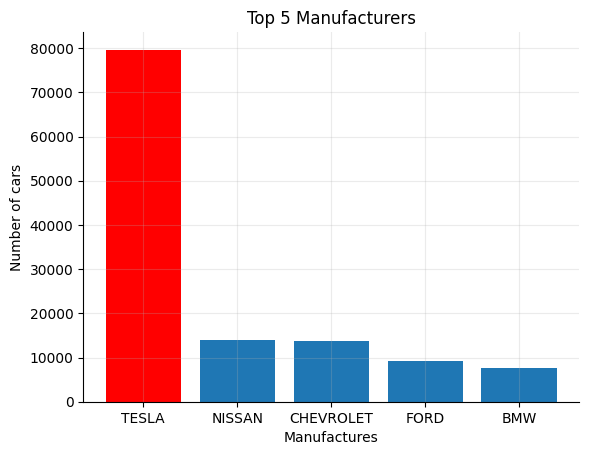

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.bar(x=top_five_manufacturers['Make'], height=top_five_manufacturers['count'])
plt.bar(x=top_five_manufacturers['Make'][0], height=top_five_manufacturers['count'][0], color='red')
plt.title('Top 5 Manufacturers')
plt.xlabel('Manufactures')
plt.ylabel('Number of cars')
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(True, alpha=0.25)
plt.show()

Even though there is high competition, TESLA has dominated the EV market with highest market share.

In [ ]:
# what are the top models

top_five_models = pd.DataFrame(data['Model'].value_counts().head(5)).reset_index()
top_five_models

,Model,count
0,MODEL Y,35989
1,MODEL 3,30091
2,LEAF,13365
3,MODEL S,7734
4,BOLT EV,6821


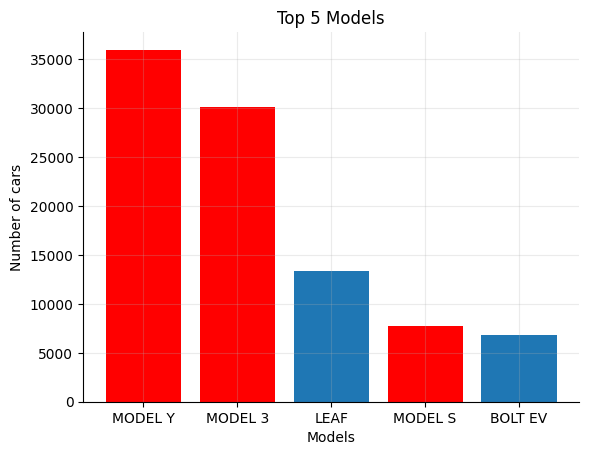

In [ ]:
plt.bar(x=top_five_models['Model'], height=top_five_models['count'])
for i in [0, 1, 3]:
  plt.bar(x=top_five_models['Model'][i], height=top_five_models['count'][i], color='red')
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Models')
plt.ylabel('Number of cars')
plt.title('Top 5 Models')
plt.grid(True, alpha=0.25)
plt.show()

Three among the top 5 models are from Tesla which is understandable.

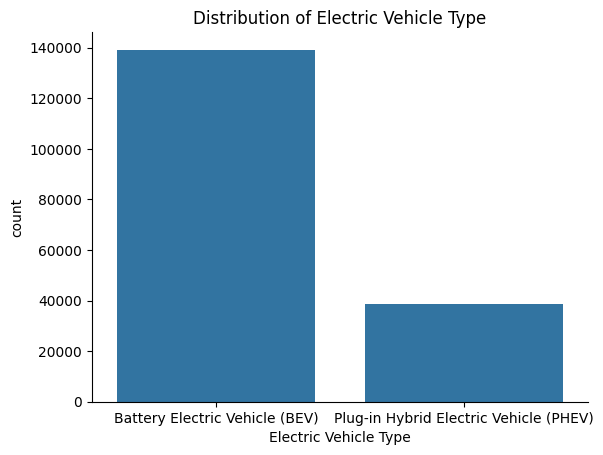

In [ ]:
sns.countplot(x=data['Electric Vehicle Type'])
plt.title('Distribution of Electric Vehicle Type')
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

We can clearly see that BEV vehicles are preferred over the PHEV vehicles.

In [ ]:
Erange = [x for x in data['Electric Range'] if x != 0]

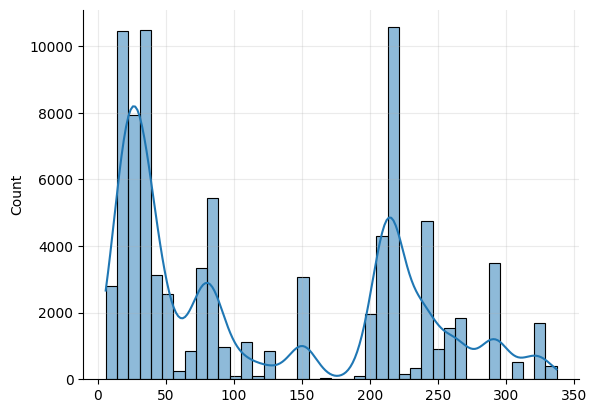

In [ ]:
sns.histplot(Erange, kde=True)
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(True, alpha=0.25)
plt.show()

In [ ]:
ER_top_five_makers = data[data['Make'].isin(top_five_manufacturers['Make']) & data['Electric Range'] != 0]

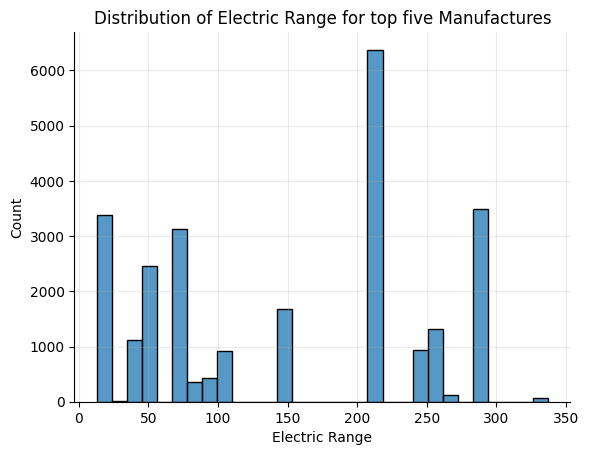

In [ ]:
sns.histplot(ER_top_five_makers['Electric Range'])
plt.title('Distribution of Electric Range for top five Manufactures')
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(True, alpha=0.25)
plt.show()

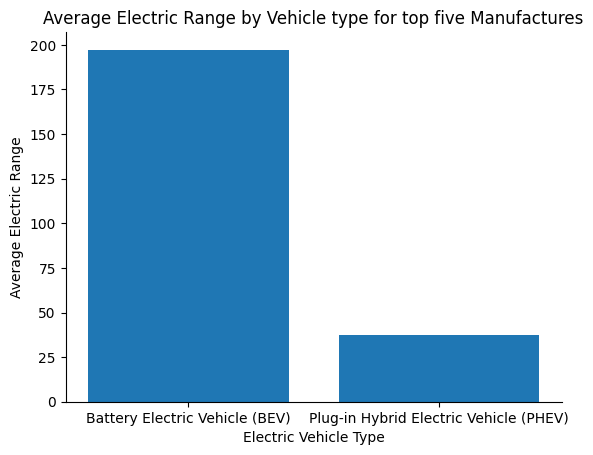

In [ ]:
ERdf = pd.DataFrame(ER_top_five_makers.groupby('Electric Vehicle Type')['Electric Range'].mean()).reset_index()

plt.bar(x=ERdf['Electric Vehicle Type'], height=ERdf['Electric Range'])
plt.ylabel('Average Electric Range')
plt.xlabel('Electric Vehicle Type')
plt.title('Average Electric Range by Vehicle type for top five Manufactures')
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

The lower values in Electric range column is due to PHEV vehicles.

In [ ]:
MSRP_top_five_makers = data[data['Base MSRP'] != 0]
MSRP_top_five_makers = MSRP_top_five_makers[MSRP_top_five_makers['Make'].isin(top_five_manufacturers['Make'])]
MSRP_top_five_makers

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Base MSRP
187,Yakima,Yakima,WA,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,69900
218,Kitsap,Port Orchard,WA,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,69900
293,King,Tukwila,WA,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),14,44100
315,King,Kirkland,WA,2018,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),14,45600
366,King,Newcastle,WA,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,69900
...,...,...,...,...,...,...,...,...,...
177334,Spokane,Spokane,WA,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,69900
177366,King,Redmond,WA,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,69900
177391,Snohomish,Snohomish,WA,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,69900
177605,Pierce,Gig Harbor,WA,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,69900


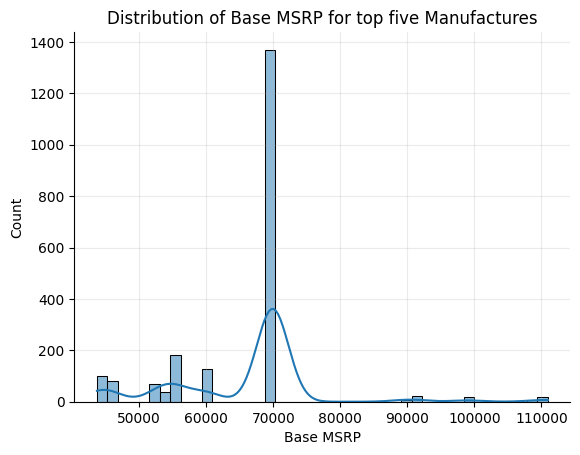

In [ ]:
sns.histplot(MSRP_top_five_makers['Base MSRP'], kde=True)
plt.grid(True, alpha=0.25)
plt.title('Distribution of Base MSRP for top five Manufactures')
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

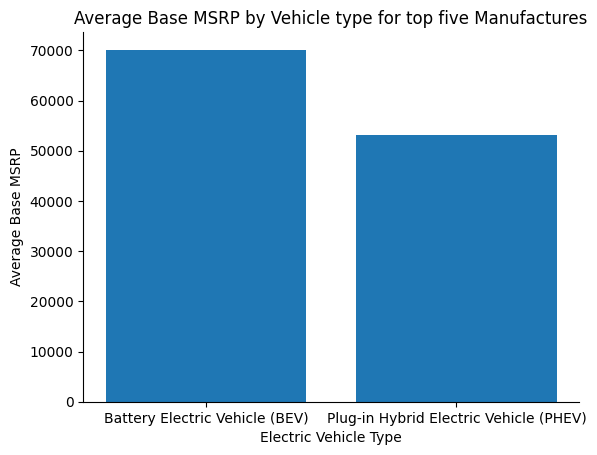

In [ ]:
MSRPdf = pd.DataFrame(MSRP_top_five_makers.groupby('Electric Vehicle Type')['Base MSRP'].mean()).reset_index()

plt.bar(x=MSRPdf['Electric Vehicle Type'], height=MSRPdf['Base MSRP'])
plt.ylabel('Average Base MSRP')
plt.xlabel('Electric Vehicle Type')
plt.title('Average Base MSRP by Vehicle type for top five Manufactures')
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [ ]:
MSRPdf

,Electric Vehicle Type,Base MSRP
0,Battery Electric Vehicle (BEV),70137.467617
1,Plug-in Hybrid Electric Vehicle (PHEV),53120.259481


In [ ]:
(70000-53000)/53000*100

32.075471698113205

BEV Vechicles are 30% more expensive than PHEV vehicles. still people choose the BEVs

In [ ]:
city = pd.DataFrame(data['City'].value_counts().head(3)).reset_index()
city

,City,count
0,Seattle,29447
1,Bellevue,8931
2,Redmond,6478


In [ ]:
county = pd.DataFrame(data['County'].value_counts().head(3)).reset_index()
county

,County,count
0,King,92740
1,Snohomish,21001
2,Pierce,13782


In [ ]:
state = pd.DataFrame(data['State'].value_counts().head(3)).reset_index()
state

,State,count
0,WA,177477
1,CA,101
2,VA,46


In [ ]:
x=year['Model Year'][:-1]
y=year['count'][:-1]

p = np.poly1d(np.polyfit(x, y, 2))

In [ ]:
preds, forecast = [], []
for i in range(2024, 2029):
  preds.append(math.ceil(p(i)))
  forecast.append(i)


In [ ]:
preds

[53546, 64534, 76565, 89640, 103757]

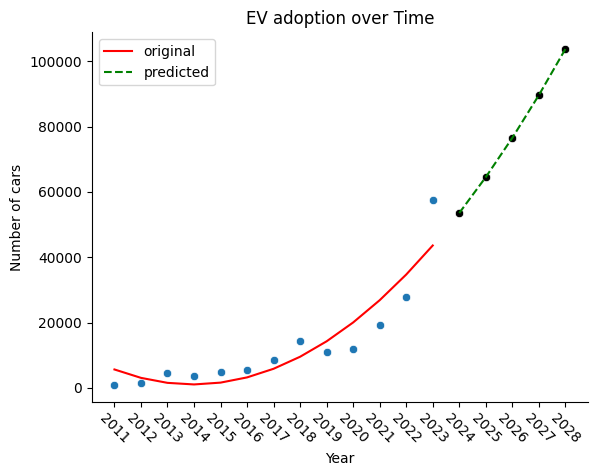

In [ ]:
sns.scatterplot(x=x, y=y)
plt.plot(x, p(x), color='red', label='original')
sns.scatterplot(x=forecast, y=preds, color='black')
plt.plot(forecast, preds, color='green', linestyle='--', label='predicted')
plt.title('EV adoption over Time')
plt.xlabel('Year')
plt.ylabel('Number of cars')
plt.xticks(range(2011, 2029), rotation=-45)
ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
plt.show()

In [ ]:
def cagr(final, begin, t):
  return math.floor((((final/begin)**(1/t))-1)*100)

In [ ]:
cagr(103757, 53546, 5)

14